In [1]:
import numpy as np
import time, os
import matplotlib.pyplot as plt
from misc import load_folders, show_plots
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

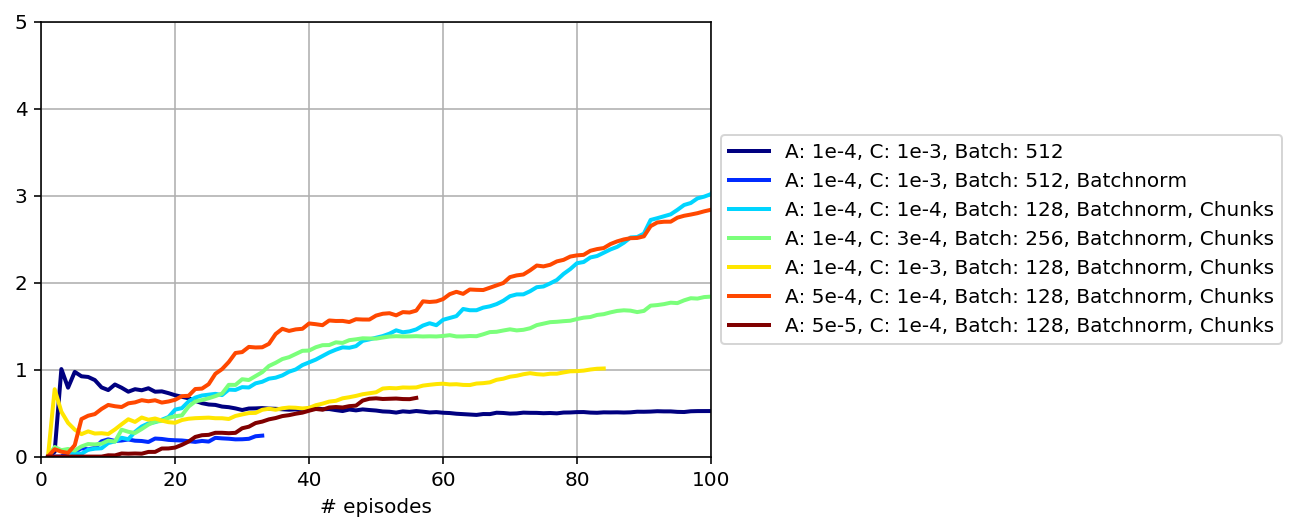

In [2]:
folders = ["400_300_a_1e-4_c_1e-3_batch_512",
           "400_300_bn_a_1e-4_c_1e-3_batch_512",
           "400_300_chunk_actor_1e-4_critic_1e-4_batch_128",
           "400_300_chunk_actor_1e-4_critic_3e-4_batch_256",
           "400_300_chunk_actor_1e-4_critic_1e-3_batch_128",
           "400_300_chunk_actor_5e-4_critic_1e-4_batch_128",
           "400_300_chunk_actor_5e-5_critic_1e-4_batch_128"
          ]
           
labels = ["A: 1e-4, C: 1e-3, Batch: 512",
          "A: 1e-4, C: 1e-3, Batch: 512, Batchnorm",
          "A: 1e-4, C: 1e-4, Batch: 128, Batchnorm, Chunks",
          "A: 1e-4, C: 3e-4, Batch: 256, Batchnorm, Chunks",
          "A: 1e-4, C: 1e-3, Batch: 128, Batchnorm, Chunks",
          "A: 5e-4, C: 1e-4, Batch: 128, Batchnorm, Chunks",
          "A: 5e-5, C: 1e-4, Batch: 128, Batchnorm, Chunks"
         ]
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)
show_plots(mean_scores, scores, labels=labels, only_mean=True, legend_outside=True)
plt.xlim([0,100])
plt.ylim([0,5])
plt.savefig("Initial attempts.png", dpi=100, bbox_inches='tight')

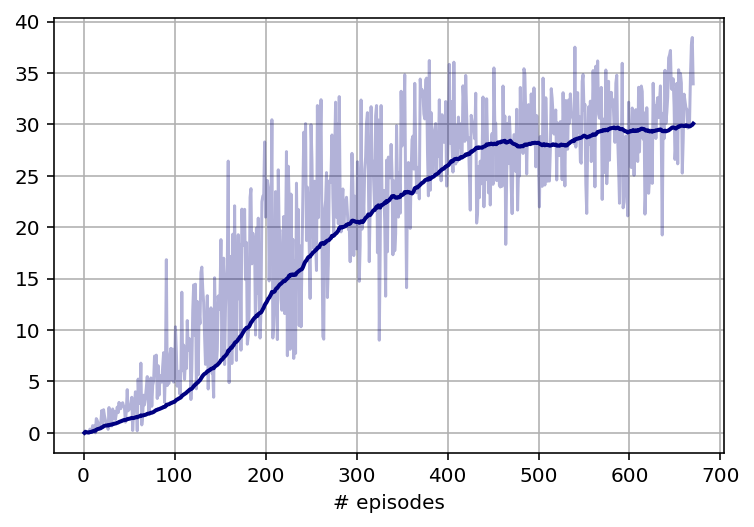

In [3]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = None
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)
show_plots(mean_scores, scores, labels=labels, only_mean=False)
plt.savefig("DDPG Solved.png", dpi=100)

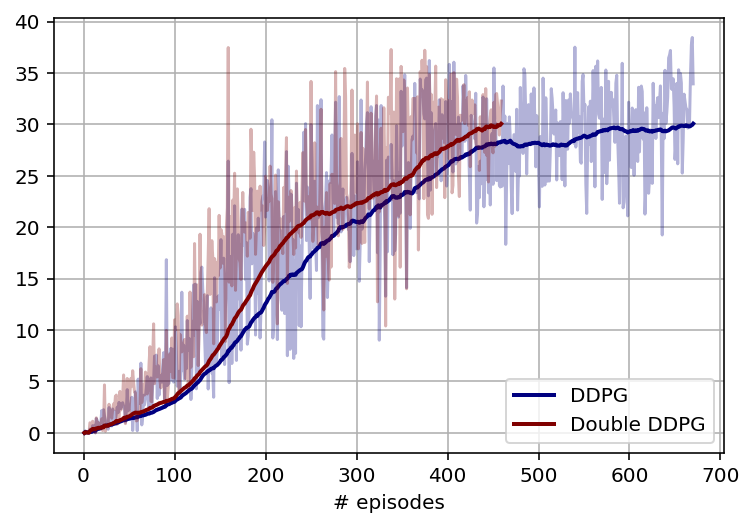

In [4]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128",
          "double_400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = ["DDPG", "Double DDPG"]
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)
show_plots(mean_scores, scores, labels=labels, only_mean=False)
plt.savefig("DDPG vs Double DDPG.png", dpi=100)

Save weights

In [6]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128",
          "double_400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = ["DDPG", "Double DDPG"]
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)

torch.save(actor_dicts[0], "checkpoint_actor_DDPG.pth")
torch.save(critic_dicts[0], "checkpoint_critic_DDPG.pth")
torch.save(actor_dicts[1], "checkpoint_actor_Double_DDPG.pth")
torch.save(critic_dicts[1], "checkpoint_critic_Double_DDPG.pth")

In [7]:
(570 - 359) / 570

0.3701754385964912